<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/feed_forward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

In [0]:
tfe = tf.contrib.eager
tfk = tf.keras

In [0]:
def toy_data():
    x = np.linspace(-2, 2, 100).reshape(-1, 1)
    a1 = np.random.randn(1)
    a2 = np.random.randn(1)
    a3 = np.random.randn(1)
    b = np.random.randn(1)
    y = a1*x + a2*x**2 + a3*x**3 + 3*np.random.randn(100, 1)
    return x, y

x, y = toy_data()

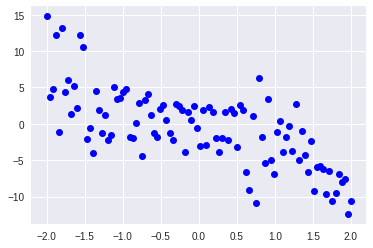

In [97]:
# polynomial
plt.plot(x, y, "bo")

In [0]:
x_train = tf.convert_to_tensor(x, dtype=tf.float32)
y_train = tf.convert_to_tensor(y, dtype=tf.float32)

In [0]:
learning_rate = 1e-4
hidden_size = 10

model_relu = tfk.Sequential([
    tfk.layers.Dense(hidden_size, activation="relu"),
    tfk.layers.Dense(hidden_size, activation="relu"),
    tfk.layers.Dense(1),
])

model_tanh = tfk.Sequential([
    tfk.layers.Dense(hidden_size, activation="tanh"),
    tfk.layers.Dense(hidden_size, activation="tanh"),
    tfk.layers.Dense(1),
])

def loss_fn(model, x, y):
    y_ = model(x)
    return tfk.losses.mean_squared_error(y, y_)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
value_and_grads = tfe.implicit_value_and_gradients(loss_fn)

In [100]:
for i in range(1000):
    # training model_relu
    loss_relu, grads = value_and_grads(model_relu, x_train, y_train)
    optimizer.apply_gradients(grads)
    
    # training model_tanh
    loss_tanh, grads = value_and_grads(model_tanh, x_train, y_train)
    optimizer.apply_gradients(grads)
    
    if (i + 1) % 100 == 0:
        print("epoch ", i + 1)
        print("loss_relu : {:0.3f}".format(loss_relu.numpy().mean()))
        print("loss_tanh : {:0.3f}".format(loss_tanh.numpy().mean()))        

epoch  100
loss_relu : 13.748
loss_tanh : 14.797
epoch  200
loss_relu : 13.083
loss_tanh : 14.364
epoch  300
loss_relu : 12.880
loss_tanh : 14.045
epoch  400
loss_relu : 12.715
loss_tanh : 13.514
epoch  500
loss_relu : 12.606
loss_tanh : 12.755
epoch  600
loss_relu : 12.562
loss_tanh : 12.255
epoch  700
loss_relu : 12.451
loss_tanh : 12.039
epoch  800
loss_relu : 12.271
loss_tanh : 11.943
epoch  900
loss_relu : 12.227
loss_tanh : 11.892
epoch  1000
loss_relu : 12.186
loss_tanh : 11.860


In [0]:
y_predict_relu = model_relu(x_train).numpy()
y_predict_tanh = model_tanh(x_train).numpy()

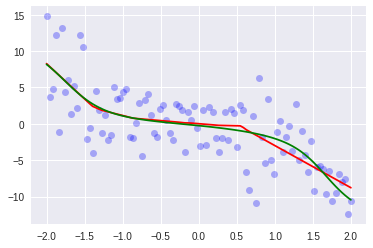

In [102]:
# polynomial data
plt.plot(x, y, "bo", alpha=0.3)
# model_relu predict
plt.plot(x, y_predict_relu, color="r")
# model_tanh predict
plt.plot(x, y_predict_tanh, color="g")